
# Project: Investigate a Dataset (European Soccer Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This is a brief introduction to my project which is based on dataset from European soccer data. The dataset is quite extensive with different tables like (Team, Country, League, Match, Player, Player_Attribute, Team_Attribute). 


> **Questions**: With this dataset, i'd like to answer questions like:
> - What team has the best defensive record (clean sheet)?
> - What League has the most goals?
> - What team has the best home & Away record (Most Wins)
> - Is there a relationship between the best defensive record and the best win record?

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df_country = pd.read_csv('European Database/Country.csv', header=0)
df_league = pd.read_csv('European Database/League.csv', header=0)
df_match = pd.read_csv('European Database/Match.csv', header=0)
df_player = pd.read_csv('European Database/Player.csv', header=0)
df_player_attribute = pd.read_csv('European Database/Player_Attributes.csv', header=0)
df_team = pd.read_csv('European Database/Team.csv', header=0)
df_team_attribute = pd.read_csv('European Database/Team_Attributes.csv', header=0)

In [3]:
df_league.shape

(11, 3)

In [4]:
df_league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


### Information about the Country Table

> - The Country table has no duplicates or missing values 
> - it contains 11 rows and 2 coumns

### Information about the League Table 

> - The league table has 11 rows and 3 columns
> - It has no duplicates or missing values
> - all the datatypes are correct

In [5]:
df_match.isna().sum()

id                0
country_id        0
league_id         0
season            0
stage             0
              ...  
GBD           11817
GBA           11817
BSH           11818
BSD           11818
BSA           11818
Length: 115, dtype: int64

### Information about the Match table 

> - The match table contains 25,979 rows and 115 columns
> - Has no duplicates 
> - It contains thousands of missing data in the (GBD, GBA, BSH, BSD, BSA) columns so i have decided to drop them

In [6]:
df_match.isna().sum().sum()

407395

In [7]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [8]:
df_player.isna().sum()

id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

In [9]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [10]:
df_player_attribute.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


### Information about the Player table

> - The player table has 11,060 rows and 7 columns
> - It has no duplicates
> - No missing values

In [11]:
df_player_attribute.isna().sum().sum()

47301

### Information About the Player Attribute Table

> - The player attribute table has 183978 rows and 42 columns
> - Zero duplicates
> - The table has a total of 47,301 missing attributes

In [12]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


### Information about the Team Table

> - The shape table has 299 rows and 5 columns
> - Zero duplicates
> - It has 11 missing attributes

In [13]:
df_team_attribute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

### Information about the Team attribute Table

> - The team table has 1,458 rows and 25 columns
> - It has no duplicates
> - It has 969 Missing values

### Data Cleaning (Replace this with more specific notes!)

### Working on the League and Country Table

> - Here we are going to join these 2 tables 

In [14]:
df_league = df_league.merge(df_country, how='inner', on='id')
df_league.head()

,id,country_id,name_x,name_y
0,1,1,Belgium Jupiler League,Belgium
1,1729,1729,England Premier League,England
2,4769,4769,France Ligue 1,France
3,7809,7809,Germany 1. Bundesliga,Germany
4,10257,10257,Italy Serie A,Italy


In [15]:
df_league.rename(columns={'name_x':'League_name'}, inplace=True)
df_league.rename(columns={'name_y':'Country_name'}, inplace=True)
df_league.head()

,id,country_id,League_name,Country_name
0,1,1,Belgium Jupiler League,Belgium
1,1729,1729,England Premier League,England
2,4769,4769,France Ligue 1,France
3,7809,7809,Germany 1. Bundesliga,Germany
4,10257,10257,Italy Serie A,Italy


### Cleaning the Match Table

> - The match table has a lot of missing values(407395) and are not useful, so i'll go ahead and drop them here 
> - I'll merge  the league and match tables together
> - Also i'll merge the match table with the team table

In [16]:
df_match.dropna(axis = 1, inplace=True)

In [17]:
df_match.isna().sum()

id                  0
country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
dtype: int64

In [18]:
#merging the league and match tables together

df_match = df_match.merge(df_league, how='inner', on='country_id')
df_match.head()

,id_x,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,id_y,League_name,Country_name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,1,Belgium Jupiler League,Belgium
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,1,Belgium Jupiler League,Belgium
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,1,Belgium Jupiler League,Belgium
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,1,Belgium Jupiler League,Belgium
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,1,Belgium Jupiler League,Belgium


In [19]:
df_match.rename(columns={'id_x' : 'id'}, inplace=True)

df_match.drop(columns=['id_y'], inplace=True)

df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,League_name,Country_name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,Belgium Jupiler League,Belgium
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,Belgium Jupiler League,Belgium
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,Belgium Jupiler League,Belgium
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,Belgium Jupiler League,Belgium
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,Belgium Jupiler League,Belgium


In [20]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [21]:
#merging the match and team table together
#this is going to be in 2 ways by home_team_api_id and away_team_api_id

df_match = df_match.merge(df_team, how='inner', left_on='home_team_api_id', right_on='team_api_id')
df_match.head()

,id_x,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,League_name,Country_name,id_y,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,Belgium Jupiler League,Belgium,1,9987,673.0,KRC Genk,GEN
1,29,1,1,2008/2009,12,2008-11-15 00:00:00,492583,9987,9999,1,1,Belgium Jupiler League,Belgium,1,9987,673.0,KRC Genk,GEN
2,47,1,1,2008/2009,14,2008-11-29 00:00:00,492651,9987,9984,3,2,Belgium Jupiler League,Belgium,1,9987,673.0,KRC Genk,GEN
3,65,1,1,2008/2009,16,2008-12-13 00:00:00,492713,9987,9986,1,0,Belgium Jupiler League,Belgium,1,9987,673.0,KRC Genk,GEN
4,94,1,1,2008/2009,19,2009-01-24 00:00:00,492805,9987,9998,2,0,Belgium Jupiler League,Belgium,1,9987,673.0,KRC Genk,GEN


In [22]:
#renaming the team_long_name to home_team_name for future use

df_match.rename(columns={'id_x':'id'}, inplace=True)

df_match.rename(columns={'team_long_name':'home_team_name'}, inplace=True)

df_match.drop(columns=['id_y'], inplace=True)

df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,League_name,Country_name,team_api_id,team_fifa_api_id,home_team_name,team_short_name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,Belgium Jupiler League,Belgium,9987,673.0,KRC Genk,GEN
1,29,1,1,2008/2009,12,2008-11-15 00:00:00,492583,9987,9999,1,1,Belgium Jupiler League,Belgium,9987,673.0,KRC Genk,GEN
2,47,1,1,2008/2009,14,2008-11-29 00:00:00,492651,9987,9984,3,2,Belgium Jupiler League,Belgium,9987,673.0,KRC Genk,GEN
3,65,1,1,2008/2009,16,2008-12-13 00:00:00,492713,9987,9986,1,0,Belgium Jupiler League,Belgium,9987,673.0,KRC Genk,GEN
4,94,1,1,2008/2009,19,2009-01-24 00:00:00,492805,9987,9998,2,0,Belgium Jupiler League,Belgium,9987,673.0,KRC Genk,GEN


In [23]:
#joining on away_team_api_id

df_match = df_match.merge(df_team, how='inner', left_on='away_team_api_id', right_on='team_api_id')
df_match.head()

,id_x,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,Country_name,team_api_id_x,team_fifa_api_id_x,home_team_name,team_short_name_x,id_y,team_api_id_y,team_fifa_api_id_y,team_long_name,team_short_name_y
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,Belgium,9987,673.0,KRC Genk,GEN,2,9993,675.0,Beerschot AC,BAC
1,483,1,1,2009/2010,5,2009-08-30 00:00:00,665353,9987,9993,1,...,Belgium,9987,673.0,KRC Genk,GEN,2,9993,675.0,Beerschot AC,BAC
2,524,1,1,2010/2011,1,2010-08-01 00:00:00,838476,9987,9993,2,...,Belgium,9987,673.0,KRC Genk,GEN,2,9993,675.0,Beerschot AC,BAC
3,759,1,1,2011/2012,1,2011-07-30 00:00:00,1032694,9987,9993,3,...,Belgium,9987,673.0,KRC Genk,GEN,2,9993,675.0,Beerschot AC,BAC
4,1014,1,1,2012/2013,11,2012-10-20 00:00:00,1224064,9987,9993,3,...,Belgium,9987,673.0,KRC Genk,GEN,2,9993,675.0,Beerschot AC,BAC


In [24]:
#renaming and dropping unwanted columns

df_match.rename(columns={'id_x':'id'}, inplace=True)

df_match.rename(columns={'team_long_name':'away_team_name'}, inplace=True)

df_match.drop(columns=['id_y', 'team_fifa_api_id_x', 'team_fifa_api_id_y'], inplace=True)

df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,League_name,Country_name,team_api_id_x,home_team_name,team_short_name_x,team_api_id_y,away_team_name,team_short_name_y
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,Belgium Jupiler League,Belgium,9987,KRC Genk,GEN,9993,Beerschot AC,BAC
1,483,1,1,2009/2010,5,2009-08-30 00:00:00,665353,9987,9993,1,1,Belgium Jupiler League,Belgium,9987,KRC Genk,GEN,9993,Beerschot AC,BAC
2,524,1,1,2010/2011,1,2010-08-01 00:00:00,838476,9987,9993,2,1,Belgium Jupiler League,Belgium,9987,KRC Genk,GEN,9993,Beerschot AC,BAC
3,759,1,1,2011/2012,1,2011-07-30 00:00:00,1032694,9987,9993,3,1,Belgium Jupiler League,Belgium,9987,KRC Genk,GEN,9993,Beerschot AC,BAC
4,1014,1,1,2012/2013,11,2012-10-20 00:00:00,1224064,9987,9993,3,0,Belgium Jupiler League,Belgium,9987,KRC Genk,GEN,9993,Beerschot AC,BAC


### Working on the Player & Player Attribute Table

> - Here i'm going to join the player table and player attributes together 
> - To avoid creating missing values, i will be using the inner join for this process

In [25]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [26]:
df_player.shape

(11060, 7)

In [27]:
df_player_attribute.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [28]:
df_player_attribute.shape

(183978, 42)

In [29]:
df_player = df_player.merge(df_player_attribute, on='player_api_id', how = "inner")
df_player.head()

,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,id_y,player_fifa_api_id_y,date,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,2016-02-18 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,218353,2015-11-19 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,218353,2015-09-21 00:00:00,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,218353,2015-03-20 00:00:00,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,218353,2007-02-22 00:00:00,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [30]:
#dropping unnecessary columns
df_player.drop(columns=['id_y', 'player_fifa_api_id_y'], inplace=True)


In [31]:
#renaming the player_api_id_x
df_player.rename(columns={'id_x':'id'}, inplace=True)

In [32]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,date,overall_rating,potential,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2016-02-18 00:00:00,67.0,71.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2015-11-19 00:00:00,67.0,71.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2015-09-21 00:00:00,62.0,66.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2015-03-20 00:00:00,61.0,65.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2007-02-22 00:00:00,61.0,65.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [33]:
df_player.isna().sum()

id                         0
player_api_id              0
player_name                0
player_fifa_api_id_x       0
birthday                   0
height                     0
weight                     0
date                       0
overall_rating           836
potential                836
preferred_foot           836
attacking_work_rate     3230
defensive_work_rate      836
crossing                 836
finishing                836
heading_accuracy         836
short_passing            836
volleys                 2713
dribbling                836
curve                   2713
free_kick_accuracy       836
long_passing             836
ball_control             836
acceleration             836
sprint_speed             836
agility                 2713
reactions                836
balance                 2713
shot_power               836
jumping                 2713
stamina                  836
strength                 836
long_shots               836
aggression               836
interceptions 

In [34]:
#dealing with missing values
df_player.dropna(inplace=True)

In [35]:
df_player.isna().sum().sum()

0

In [36]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,date,overall_rating,potential,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2016-02-18 00:00:00,67.0,71.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2015-11-19 00:00:00,67.0,71.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2015-09-21 00:00:00,62.0,66.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2015-03-20 00:00:00,61.0,65.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2007-02-22 00:00:00,61.0,65.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


### Working on the Teams & Teams Attribute Table

> - Here i'm going to join the player table and player attributes together
> - To avoid creating missing values, i will be using the inner join for this process

In [37]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [38]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [39]:
df_team.isna().sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

In [40]:
#I don't really need team_fifa_api_id so i'll be dropping it 
df_team.dropna(inplace=True)

In [41]:
df_team.isna().sum()

id                  0
team_api_id         0
team_fifa_api_id    0
team_long_name      0
team_short_name     0
dtype: int64

In [42]:
df_team_attribute.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [43]:
#dealing with missing values in the buildUpPlayDribbling
df_team_attribute.fillna(df_team_attribute.mean(), inplace=True)

In [44]:
#converting the buildUpPlayDribbling from float to int
df_team_attribute['buildUpPlayDribbling']=df_team_attribute['buildUpPlayDribbling'].astype(int)

In [45]:
df_team_attribute.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,48,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,48,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,48,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [46]:
#merging the team table and the team attribute table by inner join
df_team = df_team.merge(df_team_attribute, on=['team_api_id','team_fifa_api_id'], how='inner')
df_team.head()

,id_x,team_api_id,team_fifa_api_id,team_long_name,team_short_name,id_y,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,9987,673.0,KRC Genk,GEN,485,2010-02-22 00:00:00,45,Balanced,48,...,60,Normal,Organised,70,High,65,Press,70,Wide,Cover
1,1,9987,673.0,KRC Genk,GEN,486,2011-02-22 00:00:00,66,Balanced,48,...,51,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap
2,1,9987,673.0,KRC Genk,GEN,487,2012-02-22 00:00:00,53,Balanced,48,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
3,1,9987,673.0,KRC Genk,GEN,488,2013-09-20 00:00:00,58,Balanced,48,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
4,1,9987,673.0,KRC Genk,GEN,489,2014-09-19 00:00:00,58,Balanced,52,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover


In [47]:
#dropping some unwanted columns
df_team.drop(columns=['id_y'], inplace=True)

#renaming id_x to id
df_team.rename(columns={'id_x':'id'}, inplace=True)

In [48]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,9987,673.0,KRC Genk,GEN,2010-02-22 00:00:00,45,Balanced,48,Little,...,60,Normal,Organised,70,High,65,Press,70,Wide,Cover
1,1,9987,673.0,KRC Genk,GEN,2011-02-22 00:00:00,66,Balanced,48,Little,...,51,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap
2,1,9987,673.0,KRC Genk,GEN,2012-02-22 00:00:00,53,Balanced,48,Little,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
3,1,9987,673.0,KRC Genk,GEN,2013-09-20 00:00:00,58,Balanced,48,Little,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
4,1,9987,673.0,KRC Genk,GEN,2014-09-19 00:00:00,58,Balanced,52,Normal,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover


In [49]:
df_team.duplicated().sum().sum()

1

In [50]:
df_team.drop_duplicates(inplace=True)

In [51]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1457
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1457 non-null   int64  
 1   team_api_id                     1457 non-null   int64  
 2   team_fifa_api_id                1457 non-null   float64
 3   team_long_name                  1457 non-null   object 
 4   team_short_name                 1457 non-null   object 
 5   date                            1457 non-null   object 
 6   buildUpPlaySpeed                1457 non-null   int64  
 7   buildUpPlaySpeedClass           1457 non-null   object 
 8   buildUpPlayDribbling            1457 non-null   int64  
 9   buildUpPlayDribblingClass       1457 non-null   object 
 10  buildUpPlayPassing              1457 non-null   int64  
 11  buildUpPlayPassingClass         1457 non-null   object 
 12  buildUpPlayPositioningClass     14

In [52]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,9987,673.0,KRC Genk,GEN,2010-02-22 00:00:00,45,Balanced,48,Little,...,60,Normal,Organised,70,High,65,Press,70,Wide,Cover
1,1,9987,673.0,KRC Genk,GEN,2011-02-22 00:00:00,66,Balanced,48,Little,...,51,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap
2,1,9987,673.0,KRC Genk,GEN,2012-02-22 00:00:00,53,Balanced,48,Little,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
3,1,9987,673.0,KRC Genk,GEN,2013-09-20 00:00:00,58,Balanced,48,Little,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
4,1,9987,673.0,KRC Genk,GEN,2014-09-19 00:00:00,58,Balanced,52,Normal,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover


### Working on the match table

> - Here i'll be joining the country and match tables together with the inner join
> - Also, i'll be adding a column to tell us which team won the match

In [53]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,League_name,Country_name,team_api_id_x,home_team_name,team_short_name_x,team_api_id_y,away_team_name,team_short_name_y
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,Belgium Jupiler League,Belgium,9987,KRC Genk,GEN,9993,Beerschot AC,BAC
1,483,1,1,2009/2010,5,2009-08-30 00:00:00,665353,9987,9993,1,1,Belgium Jupiler League,Belgium,9987,KRC Genk,GEN,9993,Beerschot AC,BAC
2,524,1,1,2010/2011,1,2010-08-01 00:00:00,838476,9987,9993,2,1,Belgium Jupiler League,Belgium,9987,KRC Genk,GEN,9993,Beerschot AC,BAC
3,759,1,1,2011/2012,1,2011-07-30 00:00:00,1032694,9987,9993,3,1,Belgium Jupiler League,Belgium,9987,KRC Genk,GEN,9993,Beerschot AC,BAC
4,1014,1,1,2012/2013,11,2012-10-20 00:00:00,1224064,9987,9993,3,0,Belgium Jupiler League,Belgium,9987,KRC Genk,GEN,9993,Beerschot AC,BAC


In [54]:
#adding columns to specify the team that drew, won or lost that particular match

draw = df_match['home_team_goal']==df_match['away_team_goal']
home_win = df_match['home_team_goal']>df_match['away_team_goal']
home_lose = df_match['home_team_goal']<df_match['away_team_goal']
away_win = df_match['away_team_goal']>df_match['home_team_goal']
away_lose = df_match['away_team_goal']<df_match['home_team_goal']

df_match['draw'] = draw
df_match['home_win'] = home_win
df_match['away_win'] = away_win
df_match['home_lose'] = home_lose
df_match['away_lose'] = away_lose

df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,home_team_name,team_short_name_x,team_api_id_y,away_team_name,team_short_name_y,draw,home_win,away_win,home_lose,away_lose
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,KRC Genk,GEN,9993,Beerschot AC,BAC,True,False,False,False,False
1,483,1,1,2009/2010,5,2009-08-30 00:00:00,665353,9987,9993,1,...,KRC Genk,GEN,9993,Beerschot AC,BAC,True,False,False,False,False
2,524,1,1,2010/2011,1,2010-08-01 00:00:00,838476,9987,9993,2,...,KRC Genk,GEN,9993,Beerschot AC,BAC,False,True,False,False,True
3,759,1,1,2011/2012,1,2011-07-30 00:00:00,1032694,9987,9993,3,...,KRC Genk,GEN,9993,Beerschot AC,BAC,False,True,False,False,True
4,1014,1,1,2012/2013,11,2012-10-20 00:00:00,1224064,9987,9993,3,...,KRC Genk,GEN,9993,Beerschot AC,BAC,False,True,False,False,True


In [55]:
#adding columns to specify teams clean sheet

home_team_clean_sheet = df_match['home_team_goal'] == 0
away_team_clean_sheet = df_match['away_team_goal'] == 0

df_match['home_team_clean_sheet'] = home_team_clean_sheet
df_match['away_team_clean_sheet'] = away_team_clean_sheet

df_match.head()


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,team_api_id_y,away_team_name,team_short_name_y,draw,home_win,away_win,home_lose,away_lose,home_team_clean_sheet,away_team_clean_sheet
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,9993,Beerschot AC,BAC,True,False,False,False,False,False,False
1,483,1,1,2009/2010,5,2009-08-30 00:00:00,665353,9987,9993,1,...,9993,Beerschot AC,BAC,True,False,False,False,False,False,False
2,524,1,1,2010/2011,1,2010-08-01 00:00:00,838476,9987,9993,2,...,9993,Beerschot AC,BAC,False,True,False,False,True,False,False
3,759,1,1,2011/2012,1,2011-07-30 00:00:00,1032694,9987,9993,3,...,9993,Beerschot AC,BAC,False,True,False,False,True,False,False
4,1014,1,1,2012/2013,11,2012-10-20 00:00:00,1224064,9987,9993,3,...,9993,Beerschot AC,BAC,False,True,False,False,True,False,True


In [56]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25979 entries, 0 to 25978
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     25979 non-null  int64 
 1   country_id             25979 non-null  int64 
 2   league_id              25979 non-null  int64 
 3   season                 25979 non-null  object
 4   stage                  25979 non-null  int64 
 5   date                   25979 non-null  object
 6   match_api_id           25979 non-null  int64 
 7   home_team_api_id       25979 non-null  int64 
 8   away_team_api_id       25979 non-null  int64 
 9   home_team_goal         25979 non-null  int64 
 10  away_team_goal         25979 non-null  int64 
 11  League_name            25979 non-null  object
 12  Country_name           25979 non-null  object
 13  team_api_id_x          25979 non-null  int64 
 14  home_team_name         25979 non-null  object
 15  team_short_name_x  

<a id='eda'></a>
## Exploratory Data Analysis

### What team has the best defensive record (clean sheet)?

In [114]:
#function to output clean sheet rate

home_clean_sheet_rate=round(len(df_match[df_match['home_team_clean_sheet']==True])/len(df_match),3)*100
away_clean_sheet_rate=round(len(df_match[df_match['away_team_clean_sheet']==True])/len(df_match),3)*100


print('The average home clean sheet rate = {}%'.format(home_clean_sheet_rate))
print('The average away clean sheet rate = {}%'.format(away_clean_sheet_rate))

The average home clean sheet rate = 22.7%
The average away clean sheet rate = 33.4%


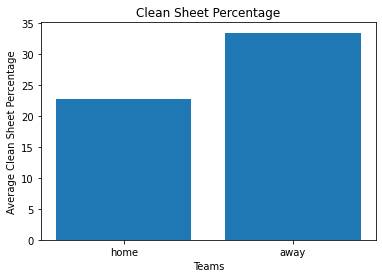

In [115]:
#bar chat to show the clean sheet rate

location = [1, 2]
heights = [home_clean_sheet_rate, away_clean_sheet_rate]
labels = ['home', 'away']
plt.bar(location, heights, tick_label=labels)
plt.title('Clean Sheet Percentage')
plt.xlabel('Teams')
plt.ylabel('Average Clean Sheet Percentage');

In [85]:
#club with the best defensive record (clean sheet)
home_clean_sheets = df_match.groupby('home_team_name')['home_team_clean_sheet'].sum().sort_values(ascending=False).head(10)
home_clean_sheets

home_team_name
Chievo Verona           57
Aston Villa             52
St. Mirren              51
Aberdeen                48
Vitória Setúbal         47
Toulouse FC             45
Sunderland              45
Académica de Coimbra    43
Rio Ave FC              43
Bologna                 42
Name: home_team_clean_sheet, dtype: int64

In [86]:
away_clean_sheets = df_match.groupby('away_team_name')['away_team_clean_sheet'].sum().sort_values(ascending=False).head(10)
away_clean_sheets

away_team_name
RCD Espanyol        69
Stoke City          68
OGC Nice            66
Polonia Bytom       66
Stade Rennais FC    63
Getafe CF           62
Genoa               60
Sunderland          60
Chievo Verona       60
Toulouse FC         59
Name: away_team_clean_sheet, dtype: int64

In [99]:
clean_sheets = home_clean_sheets.add(away_clean_sheets, fill_value=0).sort_values(ascending=False).head(10)
clean_sheets

Chievo Verona       117.0
Sunderland          105.0
Toulouse FC         104.0
RCD Espanyol         69.0
Stoke City           68.0
Polonia Bytom        66.0
OGC Nice             66.0
Stade Rennais FC     63.0
Getafe CF            62.0
Genoa                60.0
dtype: float64

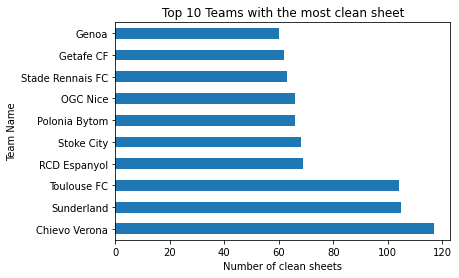

In [138]:
clean_sheets.plot(kind='barh', title = 'Top 10 Teams with the most clean sheet')
plt.xlabel('Number of clean sheets')
plt.ylabel('Team Name');

### What League has the most goals?

In [103]:
#what was the highest goal scoring league
most_goals = df_match.groupby('League_name')['home_team_goal'].sum().sort_values(ascending = False) + df_match.groupby('League_name')['home_team_goal'].sum().sort_values(ascending = False)

most_goals.sort_values(ascending=False, inplace=True)
most_goals

League_name
Spain LIGA BBVA             9918
England Premier League      9430
Italy Serie A               9056
Netherlands Eredivisie      8714
France Ligue 1              8530
Germany 1. Bundesliga       7964
Portugal Liga ZON Sagres    5780
Belgium Jupiler League      5562
Poland Ekstraklasa          5356
Scotland Premier League     5214
Switzerland Super League    4730
Name: home_team_goal, dtype: int64

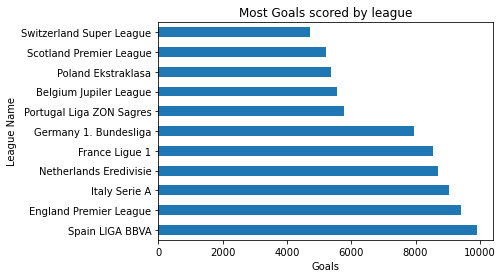

In [104]:
most_goals.plot (kind='barh', title='Most Goals scored by league')
plt.xlabel('Goals')
plt.ylabel('League Name');

### What team has the best home & Away record (Most Wins)

In [112]:
home_win_rate=round(len(df_match[df_match['home_win']==True])/len(df_match),3)*100
away_win_rate=round(len(df_match[df_match['away_win']==True])/len(df_match),3)*100


print('The average home win rate = {}%'.format(home_win_rate))
print('The average away win rate = {}%'.format(away_win_rate))

The average home win rate = 45.9%
The average away win rate = 28.7%


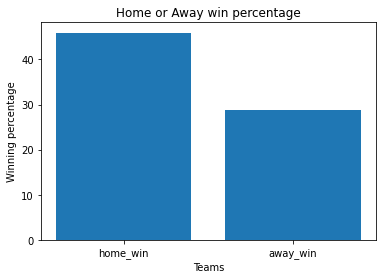

In [113]:
location = [1, 2]
heights = [home_win_rate, away_win_rate]
labels = ['home_win', 'away_win']
plt.bar(location, heights, tick_label=labels)
plt.title('Home or Away win percentage')
plt.xlabel('Teams') 
plt.ylabel('Winning percentage');

In [107]:
# Top 10 clubs with the best away win record
home_win = df_match.groupby('home_team_name')['home_win'].sum().sort_values(ascending=False).head(10)
home_win

home_team_name
FC Barcelona         131
Real Madrid CF       129
Celtic               120
Manchester United    116
Manchester City      113
FC Bayern Munich     109
Juventus             105
PSV                  105
Atlético Madrid      103
FC Basel             103
Name: home_win, dtype: int64

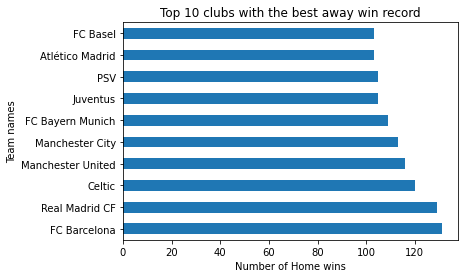

In [108]:
home_win.plot(kind='barh', title='Top 10 clubs with the best away win record')
plt.xlabel('Number of Home wins')
plt.ylabel('Team names');

In [82]:
# Top 10 clubs with the best away win record

away_win = df_match.groupby('away_team_name')['away_win'].sum().sort_values(ascending=False).head(10)
away_win

away_team_name
FC Barcelona         103
Real Madrid CF        99
Celtic                98
FC Bayern Munich      84
Juventus              84
SL Benfica            83
FC Porto              81
Ajax                  78
FC Basel              77
Manchester United     76
Name: away_win, dtype: int64

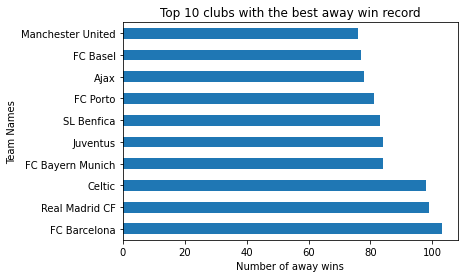

In [84]:
away_win.plot(kind='barh', title = 'Top 10 clubs with the best away win record')
plt.xlabel('Number of away wins')
plt.ylabel('Team Names');

In [110]:
#Top 10 team with the most number of wins overall

overall_win = home_win.add(away_win, fill_value=0).sort_values(ascending=False).head(10)
overall_win

FC Barcelona         234.0
Real Madrid CF       228.0
Celtic               218.0
FC Bayern Munich     193.0
Manchester United    192.0
Juventus             189.0
FC Basel             180.0
Manchester City      113.0
PSV                  105.0
Atlético Madrid      103.0
dtype: float64

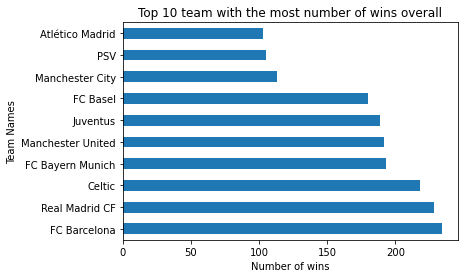

In [111]:
overall_win.plot(kind='barh', title='Top 10 team with the most number of wins overall')
plt.xlabel('Number of wins')
plt.ylabel('Team Names');

### Is there a relationship between the best defensive record and the best win record?

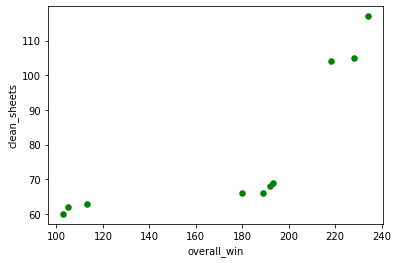

In [132]:
def scatter(x_values,y_values,x_label,y_label,title):

    plt.scatter(x_values, y_values, s=30, c='green' )
    plt.ylabel(y_label)
    plt.xlabel(x_label)


scatter(overall_win, clean_sheets,'overall_win','clean_sheets', 'overall_win vs clean_sheets')

### Limitations

> - The data didn't contain all the teams in Europe
> - There were a lot of missing values
> - A lot of players were duplicated but had different ID

### Observations

> - I found that the spanish Laliga teams performed better than other leagues when it comes to Attack and winning matches. They had the most goals scored and the most matches won overall

> - Out of the 10 top teams with the most wins overall, 3 where from Spanish La Liga

> - The team with the best defensive record is an italian team (Chievo Verona)

> - There seem to be a weak positive Linear correlation between overall_win and clean_sheet